# 1. Interpreting u0 (in-situ pore pressure) from CPT data

#### Import Used Libraries

In [2]:
from os import walk
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
from scipy.signal import argrelextrema

from utils import behaviourindex_pcpt_nonnormalised


## 1.1 Finding Existing Data that has u0 documented
Statens vegvesen (Norwegian Public Roads Administration) publishes a standard CPT interpretation workbook (https://www.vegvesen.no/fag/teknologi/geofag/geoteknikk/cptu/). 

This segment of the script looks through the downloaded NADAG dataset and looks for these files to read data from.

### 1.1.1 Search dataset for all ".xlsm" files

Point to the path where the NADAG Data is stored

In [3]:
path = r"C:\Users\User1\Documents\NADAG DATA"

Find all ".xlsm" files

In [4]:
xlsm_files = []
for dirpath, dirnames, filenames in walk(path):
    xlsm_files.extend(
        join(dirpath, f) for f in filenames if ".xlsm" in f.lower()
    )
print("Found",len(xlsm_files),"files")

Found 279 files


### 1.1.2 Read, clean, and plot data

In [5]:
dicts = []
for file in xlsm_files[:60]:
    print(file)
    if ".pdf" not in file:
        try:
            wb = openpyxl.load_workbook(file, data_only=True)
            print(file)
            names = wb.sheetnames
            print(names)
        except Exception:
            continue
        if "Beregn" in names:
            generelt = wb['Generelt']
            borenr = generelt.cell(row = 8, column = 3).value
            if borenr is None:
                borenr = generelt.cell(row = 8, column = 4).value
            if borenr is None:
                continue
            beregn = wb['Beregn']
            max_row = beregn.max_row
            z = []
            qc = []
            fs = []
            u2 = []
            u0 = []
            temp = []

            for row in range(max_row-19):
                i = row+20
                z.append(beregn.cell(row = i, column = 1).value)
                qc.append(beregn.cell(row = i, column = 2).value)
                fs.append(beregn.cell(row = i, column = 3).value)
                u2.append(beregn.cell(row = i, column = 4).value)
                temp.append(beregn.cell(row = i, column = 6).value)
                u0.append(beregn.cell(row = i, column = 20).value)
            
            dicts.append(
                {
                "prosjket_id":file.split("\\")[5],
                "borenr":borenr,
                "z":z,
                "qc":qc,
                "fs":fs,
                "u2":u2,
                "temp":temp,
                "u0":u0,
                }
            )
df = pd.DataFrame.from_dict(dicts)
df = df[df["borenr"]!=None]

C:\Users\User1\Documents\NADAG DATA\0f67cb2a-b359-43fc-bfde-ebc652d8d98c\E39 Flatoy Borelogg B.xlsm Fra 9.12.19-NO-GRU-03-NO-GRU-03.pdf
C:\Users\User1\Documents\NADAG DATA\121da6f9-5450-4e7e-9990-99ae95efa39f\1673 Afry Rotnes skole, Nittedal\Rapport 1673 Afry Rotnes skole, Nittedal.xlsm


c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\reader\drawings.py:63: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)


C:\Users\User1\Documents\NADAG DATA\121da6f9-5450-4e7e-9990-99ae95efa39f\1673 Afry Rotnes skole, Nittedal\Rapport 1673 Afry Rotnes skole, Nittedal.xlsm
['Borlogg', 'Administrasjon', 'Målebrev', 'Tap', 'Instruksjoner']
C:\Users\User1\Documents\NADAG DATA\15dc4951-f2c1-4040-a3d2-fe5105aa5221\Tolkningsark CPTU-rev05 Test BP23.xlsm
C:\Users\User1\Documents\NADAG DATA\15dc4951-f2c1-4040-a3d2-fe5105aa5221\Tolkningsark CPTU-rev05 Test BP23.xlsm
['Oversikt revisjoner', 'Tolkningsark', 'LAB', 'PLOTT', 'Beregning plott', 'Input rådatafil', 'Klassifisering', 'Resistivitet', 'Lab. beregning', 'Romvekt-manuelt', 'IP-manuelt', 'OCR-manuelt', 'Poretrykk-manuelt']
C:\Users\User1\Documents\NADAG DATA\15dc4951-f2c1-4040-a3d2-fe5105aa5221\Tolkningsark CPTU-rev05 Test BP23_versjon 2.xlsm
C:\Users\User1\Documents\NADAG DATA\15dc4951-f2c1-4040-a3d2-fe5105aa5221\Tolkningsark CPTU-rev05 Test BP23_versjon 2.xlsm
['Oversikt revisjoner', 'Tolkningsark', 'LAB', 'PLOTT', 'Beregning plott', 'Input rådatafil', 'Klas

c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\reader\workbook.py:120: UserWarning: Print area cannot be set to Defined name: Borelogg!$A:$T.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\reader\workbook.py:120: UserWarning: Print area cannot be set to Defined name: 'Miljøprøvetaking land'!$A:$K.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\reader\workbook.py:120: UserWarning: Print area cannot be set to Defined name: 'Miljøprøvetaking sjø'!$A:$J.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Feltarbeider
Lab-arbeider
Rapportering og adm
C:\Users\User1\Documents\NADAG DATA\1837c05e-b0e1-46be-855c-50ae24193b39\Borelogg 5174408_2017-08-07 del 1.xlsm
['Borelogg', 'Feltkommentarer', 'Borekort', 'Borekort n33', 'Borekort n34', 'Borekort n32', 'Borekort n31', 'Borekort n30', 'Borekort n29', 'Borekort n28', 'Borekort n27', 'Borekort n26', 'Borekort n25', 'Borekort n24', 'Borekort n23', 'Borekort n22', 'Borekort n21', 'Borekort n20', 'Borekort n19', 'Borekort n46', 'Borekort n18', 'Borekort n16', 'Borekort n15', 'Borekort n14', 'Borekort n7', 'Borekort n44', 'Borekort n45', 'Borekort n17', 'Borekort n13', 'Borekort n9', 'Borekort n10', 'Borekort n8', 'Borekort n6', 'Borekort n5', 'Borekort n4', 'Borekort n3', 'Borekort n11', 'Borekort n12', 'Borekort n1', 'Borekort N2', 'Prøvekort', 'Naver n27', 'Naver n25', 'Naver n20', 'Naver n45', 'Naver n44', 'Naver n7', 'Naver n15', 'Naver n10', 'Naver n1', 'CPTukort', 'CPTukort n25', 'CPTukort n22', 'CPTukort n44', 'CPTukort n7', 'CPTukort n1

c:\Users\lfabbri\AppData\Local\miniconda3\envs\rockmech_202301\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


C:\Users\User1\Documents\NADAG DATA\18710c2d-e9a3-41dc-b2b2-a8b68dbd6506\CPTu 05.xlsm
['Generelt', '1.Måledata', '2.Spenn.', '3.Profil', '4.Avledede', '5.Cu', '6.a-φ', '7.M', '8.OCR', "9.σ'c", '10.Dr', '11.N fakt', '12.St', '13.w & Ip', '14.ADP', '15. Diss', "16.Rob'90", "17.Rob'86", "18.Esl'00", "19.Sen'89", "20.Scn'12", "21.NIFS'15", "22.NIFS'14", "23.Rob'16", "24.Val'17", "25.SVV'18_A", "26.SVV'18_B", '27.Q', '28.F', '29.U', '30.v', '31.Res', 'LAB', 'Beregn', 'Interp', 'Klass', '3DKlass', 'kNNKlass', 'Data inn', 'Lab inn', 'diss_saml', 'Sertifikater', 'SGF-koder', '2D klass-metoder', '3D klass-metoder', 'kNN klass-metoder', 'diss_beregn_mal', 'Versjon', 'Referanser']
C:\Users\User1\Documents\NADAG DATA\18710c2d-e9a3-41dc-b2b2-a8b68dbd6506\CPTu 2019_031.xlsm
C:\Users\User1\Documents\NADAG DATA\18710c2d-e9a3-41dc-b2b2-a8b68dbd6506\CPTu 2019_031.xlsm
['Generelt', '1.Måledata', '2.Spenn.', '3.Profil', '4.Avledede', '5.Cu', '6.a-φ', '7.M', '8.OCR', "9.σ'c", '10.Dr', '11.N fakt', '12.St',

96 files were found

## 1.2 Interpreting in-situ pore pressure from CPTu data without dissipation tests or other measurement of pore pressure.

**Motivation: Interpret pore pressure from CPT readings**

The CPT data downloaded from NADAG is often not obviously associated with pore pressure data or water table readings. Therefore, in order to use normalized parameters to make interpretations from the CPT data, pore pressure data is needed from somewhere else.

CPTs contain pore pressure sensors, however during pressing of the cone, the measured pore pressure can deviate from the in-situ pore pressure due to properties of the soil (excess or negative pore pressures in contractive or dilative soils). 

Dissipation tests where the cone is stopped and pore pressure is allowed to dissipate are often used to measure in-situ pore pressure. If the soil was sufficently free draining, the pore pressure sensor would thus read close to the correct in-situ pressure during pressing. The aim of this exersize is to attempt to predict in-situ pore pressures and evaluate that prediction.

### 1.2.1 Manual function to fit hydrostatic pressure to measured lows in u2
As seen in the plots in section 1.1.2 u0 is often close to u2 when the pore pressure drops to a low (interpreted as entering a free draining layer after being in a layer where excess pore water pressure is generated).
The below function aims to fit a hydrostatic porepressure distribution to the lowest portions of the pore pressure data.

The functions are defined below for clarity, but are functions contained within utils.

The fit function combines a weighted mean squared error that penalizes overestimating, and a score based on how often the estimate is within a threshold (defaults to 0.5). It normalizes both components of the scores array by dividing them by their respective means and maxima. This gives each component a range between 0 and 1, where higher values indicate better performance.
It combines both components of the scores array by multiplying them element-wise. This gives a single score for each trial value that balances finding water levels where the hydrostatic distribution matches many indivual readings, and not overestimating and picking up on excess pore pressure generated during pushing.

In [35]:
WATER_WEIGHT = 10

def cost_MSE(y_true, y_pred, a = 0):
    '''
    Cost function

    '''
    # Shape of the dataset
    n = y_true.shape[0]
    
    # Error 
    error = y_true - y_pred
    
    # Compute the sign part of the loss function
    signs = np.sign(error) + a

    return np.dot(np.multiply(error, error), np.multiply(signs, signs)) / n

def u0_fit_score(
    u2_df: pd.DataFrame,
    Y_pred: np.ndarray,
    neg_multiplier: float = -0.95,
    pore_pressure_name: str = "measured_pore_pressure",
    depth_name: str = "depth",
    step_criteria: float = 0.5,
) -> list:
    """Calculates the fit score and the cost of the predicted pore pressure values against the measured ones.

    Args:
        u2_df: A data frame containing the measured pore pressure values and the depth values.
        Y_pred: An array containing the predicted pore pressure values.
        neg_multiplier: A factor to adjust the penalty for overestimatng the pore pressure. The default is -0.7.
        pore_pressure_name: The name of the column in u2_df that contains the measured pore pressure values. The default is "measured_pore_pressure".
        depth_name: The name of the column in u2_df that contains the depth values. The default is "depth".
        step_criteria: A threshold to determine if the difference between the predicted and measured pore pressure values is acceptable. The default is 0.5.

    Returns:
        A list containing two elements: the fit score and the cost. The fit score is a percentage that indicates how many of the predicted values are within the step criteria of the measured values, adjusted by the median of the differences. The cost is a mean squared error between the predicted and measured values, with a higher penalty for underestimating the pore pressure.
    """
    test = np.asarray(u2_df[pore_pressure_name])
    Y_pred = np.asarray(Y_pred)
    df = pd.DataFrame(test, columns=["u2"])
    df["depth"] = u2_df[depth_name]
    df["Y_pred"] = Y_pred
    df["diff"] = Y_pred - test

    cost = cost_MSE(test, Y_pred,a = neg_multiplier)
    
    # df = df[df["Y_pred"]!= 0]

    test = df["u2"].to_numpy()
    Y_pred = df["Y_pred"].to_numpy()
    
    

    df["diff"][df["diff"] < 0] = df["diff"][df["diff"] < 0] * neg_multiplier

    abs_diff = np.absolute(df["diff"])
    diff_in_criteria = abs_diff[abs_diff<step_criteria]
    if len(diff_in_criteria) == 0:
        median_in = 0
    else:
        median_in = (np.median(diff_in_criteria))-1


    return [((len(diff_in_criteria)/(1-median_in))*100),cost], (Y_pred, test, df["depth"].to_numpy())


def fit_u0(
    u2_df,
    trial_interval=0.1,
    plot=False,
    water_weight=WATER_WEIGHT,
    depth_name="depth",
    pore_pressure_name="measured_pore_pressure",
    neg_multiplier=-0.95,
):
    """ Finds the best estimate of u0 (water pressure at the surface) by minimizing the mean
    absolute difference between predicted and measured pore pressure utilizing a factor to penalize negative differences.

    Args:
        u2_df: A dataframe with columns named 'depth' and 'measured_pore_pressure'.
        trial_interval: The interval to try different values where the groundwater table is. Defaults to 0.1.
        plot: Whether to plot the scores for different values of u0. Defaults to False.
        water_weight: The weight of water in kPa/m. Defaults to WATER_WEIGHT.
        depth_name: The name of the column with depth data. Defaults to "depth".
        pore_pressure_name: The name of the column with measured pore pressure data. Defaults to "measured_pore_pressure".
        neg_multiplier: A factor to penalize negative differences. Defaults to -0.95.

    Returns:
        A series of predicted pore pressure values using the best estimate of u0.
    """
     
    depth_array = np.asarray(u2_df[depth_name])
    max_depth = depth_array.max()
    trials = np.arange(-5, max_depth, trial_interval)
    scores = []
    for trial in trials:
        depth_below_water = depth_array - trial
        depth_below_water[depth_below_water < 0] = 0
        u0_pred = depth_below_water * water_weight
        score, _ = u0_fit_score(
            u2_df,
            u0_pred,
            pore_pressure_name=pore_pressure_name,
            neg_multiplier=neg_multiplier,
            depth_name = depth_name,
        )
        scores.append(score)
    scores = np.asarray(scores)
    
    normalized_good_fit = scores[:,0]/np.mean(scores[:,0])
    normalized_good_fit = normalized_good_fit/normalized_good_fit.max()
    normalized_abs_diff = (1/scores[:,1])/(1/scores[:,1]).max()


    scores = normalized_good_fit*normalized_abs_diff

    scores = list(scores)
    index_mins = scores.index(max(scores))

    depth_below_water = depth_array - trials[index_mins]
    depth_below_water[depth_below_water < 0] = 0

    if plot:
        _, axs2 = plt.subplots(1,2, figsize=(8, 3))

        axs2[0].plot(trials, scores, label = "Final Score")
        axs2[0].plot(trials, normalized_good_fit, label = "Within Threshold Score", alpha = 0.2)
        axs2[0].plot(trials, normalized_abs_diff, label = "Adjusted MSE", alpha = 0.2)
        axs2[0].legend()
        #if len(minima[0]) > 0:
        if index_mins:
            axs2[0].set_xlabel("Trial depth (m)")
            axs2[0].set_ylabel("Fit score (-)")
            axs2[0].set_title(
                "Fit of Trial Depths. \n Max marked with 'x' represents best trial"
            )
            axs2[0].plot(trials[index_mins], scores[index_mins], "x")
            
            _, out = u0_fit_score(
                                    u2_df,
                                    depth_below_water * water_weight,
                                    pore_pressure_name=pore_pressure_name,
                                    neg_multiplier=neg_multiplier,
                                    depth_name = depth_name,
                                  )

            
            axs2[1].plot(out[0],out[2],label = "U2 Measurement",linestyle=(0, (5, 10)))
            axs2[1].plot(out[1],out[2], alpha = 0.2,label = "U0 Prediction")
            axs2[1].invert_yaxis()
            axs2[1].legend()
            

    return depth_below_water * water_weight


The fit function combines a weighted mean squared error that penalizes overestimating, and a score based on how often the estimate is within a threshold (defaults to 0.5). It normalizes both components of the scores array by dividing them by their respective means and maxima. This gives each component a range between 0 and 1, where higher values indicate better performance.
It combines both components of the scores array by multiplying them element-wise. This gives a single score for each trial value that balances both accuracy and precision.


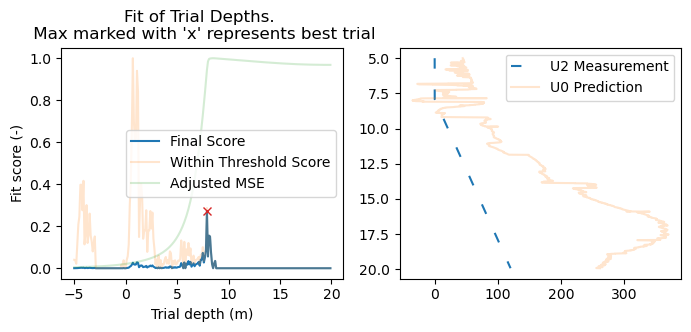

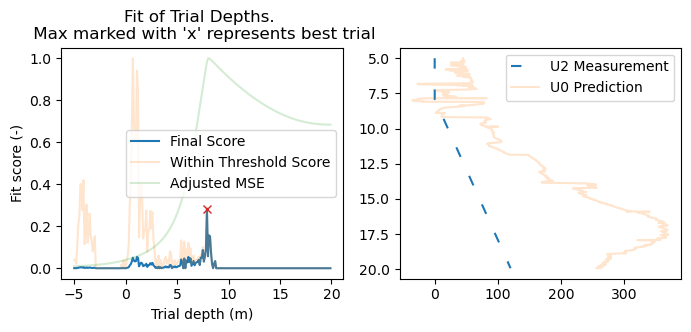

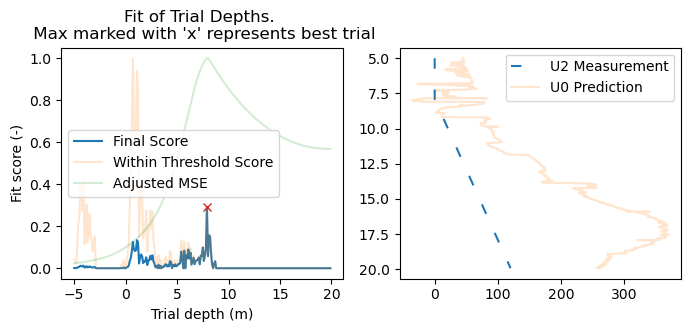

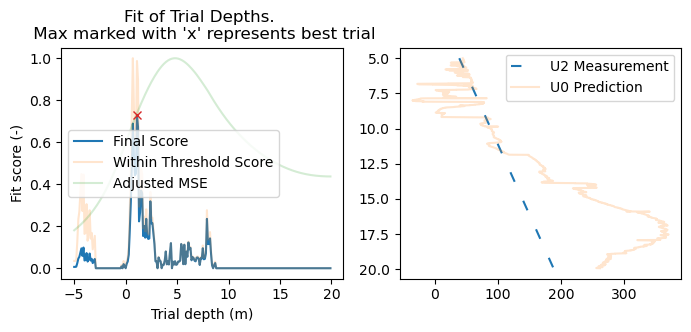

In [36]:
for i in [-.99,-0.95,-0.9,-0.7]:

    u_pred = fit_u0(
            df.iloc[8],
            plot = True,
            trial_interval=0.1,
            depth_name="z",
            pore_pressure_name="u2",
            neg_multiplier=i,
        )

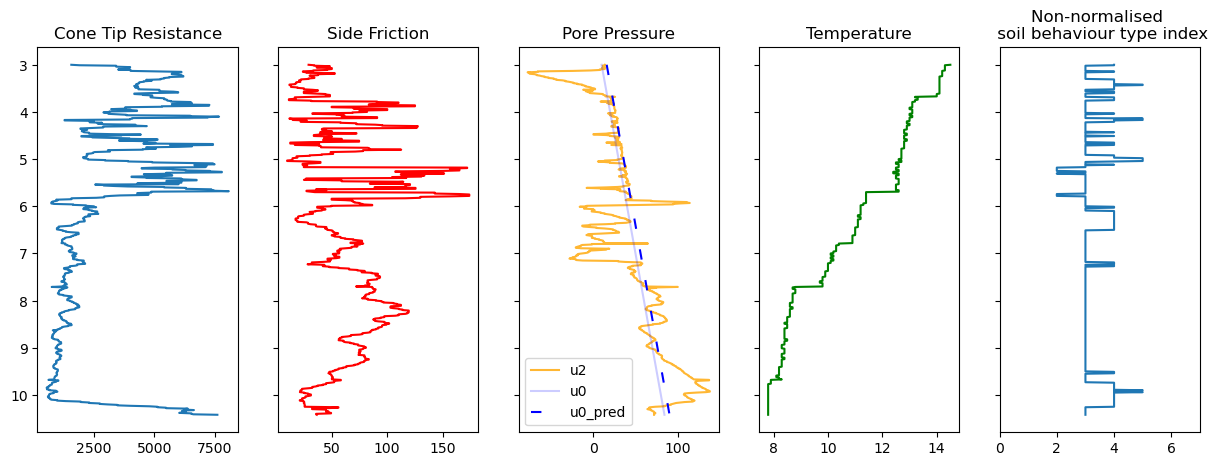

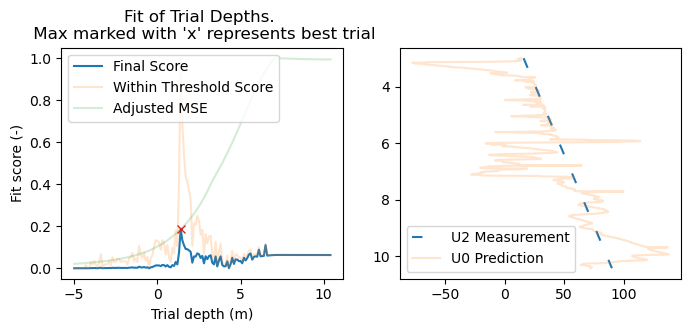

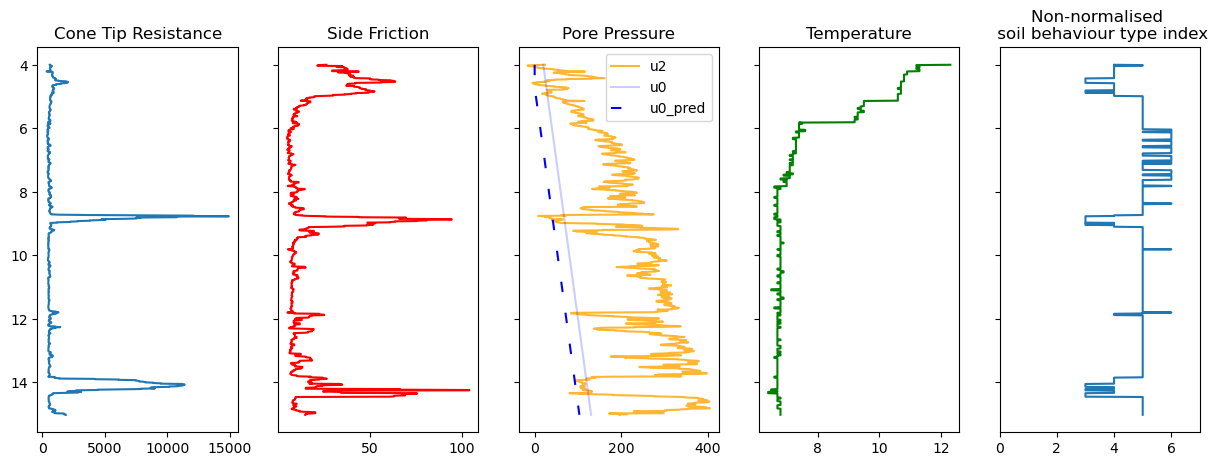

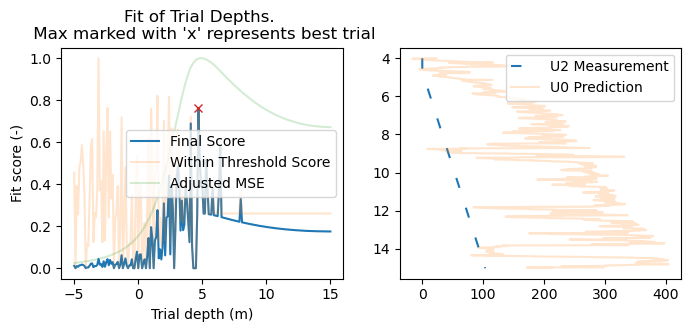

In [39]:
vec_behavioir_index = np.vectorize(behaviourindex_pcpt_nonnormalised)
for _, data in df.loc[3:4].iterrows():#df.iterrows():#
    if data.borenr is None:
        continue
    fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 5))

    axs[0].invert_yaxis()

    axs[0].plot(data["qc"], data["z"])
    axs[0].set_title("Cone Tip Resistance")

    axs[1].plot(data["fs"], data["z"], c="red")
    axs[1].set_title("Side Friction")

    axs[2].plot(data["u2"], data["z"], c="orange", alpha=0.8, label="u2")
    axs[2].plot(data["u0"], data["z"], c="blue", alpha=0.2, label="u0")

    u0_pred = fit_u0(
        data,
        plot = True,
        trial_interval=0.1,
        depth_name="z",
        pore_pressure_name="u2",
        neg_multiplier=-0.95,
    )
    axs[2].plot(u0_pred, data["z"], c="blue", label="u0_pred", linestyle=(0, (5, 10)))
    axs[2].legend()
    axs[2].set_title("Pore Pressure")

    axs[3].plot(data["temp"],data["z"], c = "green")
    axs[3].set_title("Temperature")

    soil_type = vec_behavioir_index(np.asarray(data.qc), np.asarray(data.fs))

    axs[4].plot(soil_type, data["z"])
    axs[4].set_title("Non-normalised \n soil behaviour type index")
    axs[4].set_xlim((0, 7))
    plt.show()